In [87]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions


In [88]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [89]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "preprocessed_data",
    shuffle=True,
    batch_size=BATCH_SIZE
    )

Found 3694 files belonging to 5 classes.


In [90]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot_rm_au',
 'Pepper__bell___healthy_rm_au',
 'Potato___Early_blight_rm_au',
 'Potato___Late_blight_rm_au',
 'Potato___healthy_rm_au']

In [91]:
len(dataset)

116

In [92]:
for image_batch, lable_batch in dataset.take(1):
    print(image_batch.shape)
    print(lable_batch.numpy())
    

(32, 256, 256, 3)
[0 0 1 0 1 1 1 0 1 1 2 4 1 2 0 0 1 0 1 4 1 0 2 2 1 2 1 2 1 2 0 2]


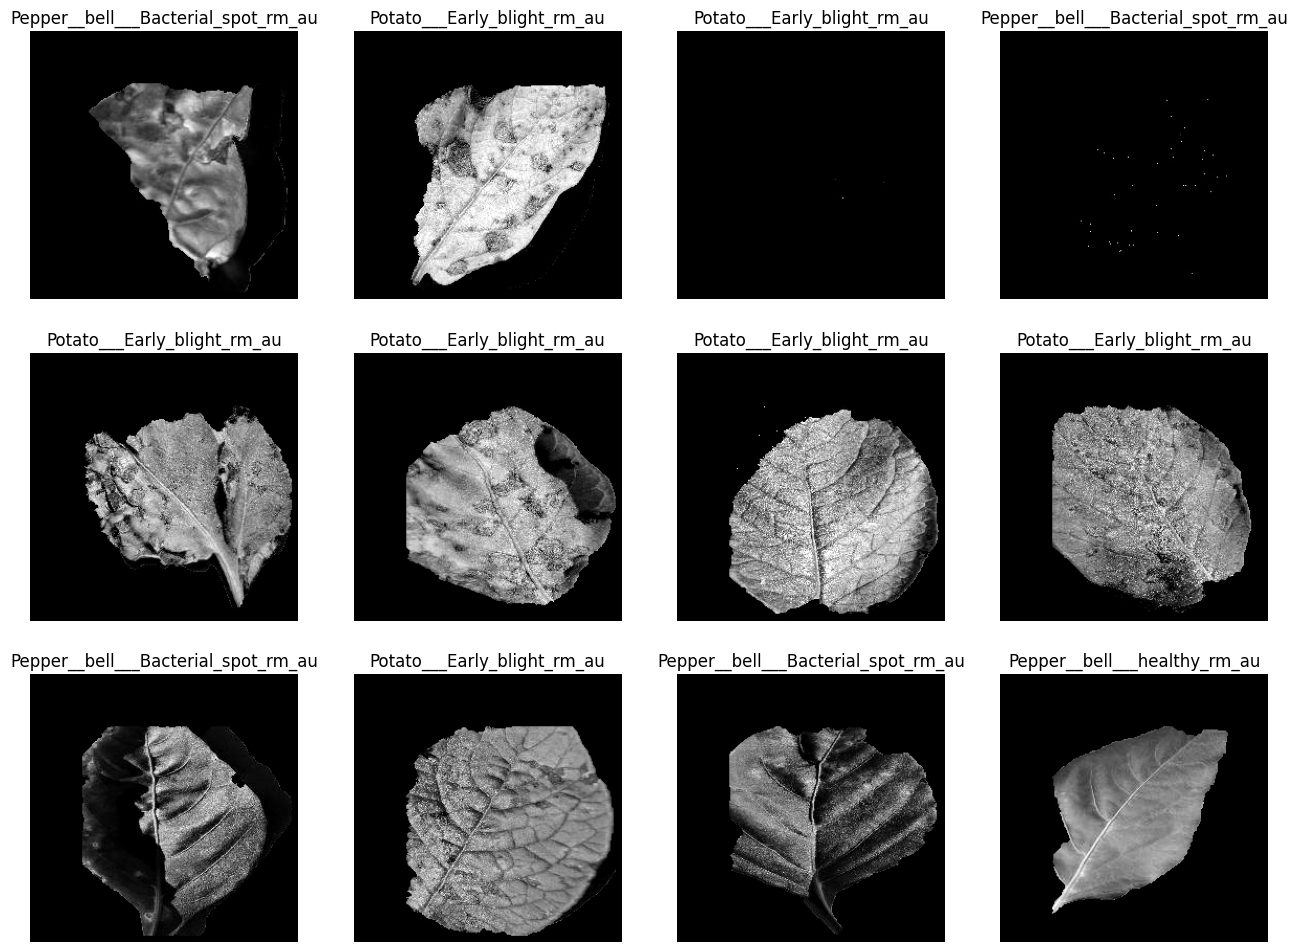

In [93]:
plt.figure(figsize=(16, 16))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")
       

In [94]:
len(dataset)


116

In [95]:
# Split Dataset
# Training: will be used while training => 80%
# Validation: tested against while training => 10%
# Test: tested against after we trained a model => 10%


In [96]:
len(dataset)

116

In [97]:
train_size = 0.8
len(dataset)*train_size

92.80000000000001

In [98]:
test_ds = dataset.skip(116)
len(test_ds)

0

In [99]:
val_size=0.1
len(dataset)*val_size

11.600000000000001

In [100]:
val_ds = test_ds.take(14)
len(val_ds)

0

In [101]:
test_ds = test_ds.skip(14)
len(test_ds)

0

In [102]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [103]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [104]:
len(train_ds)

92

In [105]:
len(val_ds)

11

In [106]:
len(test_ds)

13

In [107]:
train_ds = train_ds.cache().shuffle(500).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(500).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(500).prefetch(buffer_size=tf.data.AUTOTUNE)

In [109]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()